In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel("spambasePCAKNNpracticedataset-1569661171585.xlsx", sheet_name = 2)

In [3]:
spam = data
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,SpamYorN
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
spam.shape

(4601, 58)

In [5]:
spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,SpamYorN
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [6]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

In [7]:
type=spam['SpamYorN'].groupby(spam['SpamYorN']).count()
type

SpamYorN
0    2788
1    1813
Name: SpamYorN, dtype: int64

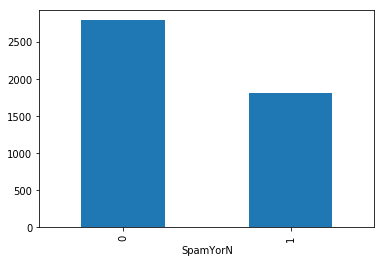

In [8]:
type.plot('bar')

C:\Users\aaacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


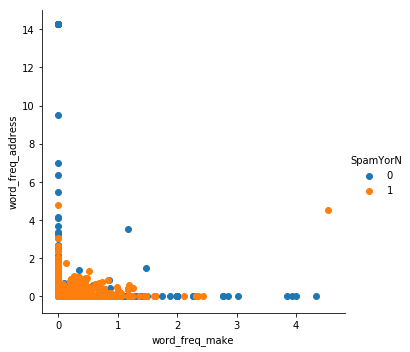

In [9]:
sns.FacetGrid(spam, hue="SpamYorN", size=5) \
   .map(plt.scatter, "word_freq_make", "word_freq_address") \
   .add_legend()

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import time

In [11]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(spam.iloc[:,:-1].values)
        
df = spam.copy()
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.92702701 0.07104297 0.00184372]


No handles with labels found to put in legend.


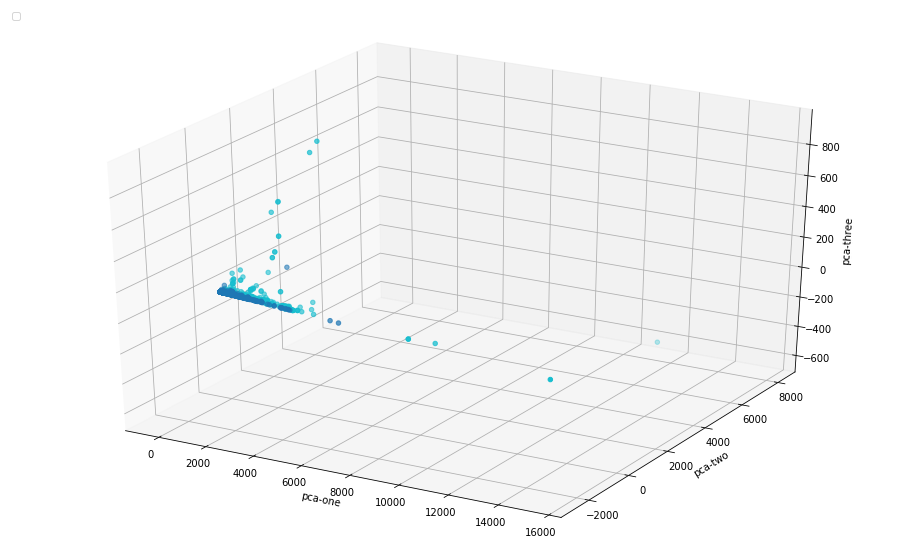

In [12]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"],
    c=df["SpamYorN"],
    cmap='tab10'
)

ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
ax.legend(loc = 2)

plt.show()

In [13]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(spam.iloc[:,:-1].values)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4601 samples in 0.046s...
[t-SNE] Computed neighbors for 4601 samples in 0.784s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4601
[t-SNE] Computed conditional probabilities for sample 2000 / 4601
[t-SNE] Computed conditional probabilities for sample 3000 / 4601
[t-SNE] Computed conditional probabilities for sample 4000 / 4601
[t-SNE] Computed conditional probabilities for sample 4601 / 4601
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.426666
[t-SNE] KL divergence after 300 iterations: 1.290007
t-SNE done! Time elapsed: 27.935752630233765 seconds


In [14]:
spam.skew()

word_freq_make                 5.675639
word_freq_address             10.086811
word_freq_all                  3.009249
word_freq_3d                  26.227744
word_freq_our                  4.747126
word_freq_over                 5.956953
word_freq_remove               6.765580
word_freq_internet             9.724848
word_freq_order                5.226067
word_freq_mail                 8.487810
word_freq_receive              5.510250
word_freq_will                 2.867354
word_freq_people               6.955548
word_freq_report              11.754645
word_freq_addresses            6.971041
word_freq_free                10.763594
word_freq_business             5.688642
word_freq_email                5.413754
word_freq_you                  1.591674
word_freq_credit              14.602587
word_freq_your                 2.435527
word_freq_font                 9.975441
word_freq_000                  5.713775
word_freq_money               14.687028
word_freq_hp                   5.716843


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

label = spam.pop('SpamYorN')

sc.fit(spam)                                                                                   # fit the data to Standardscaler

spam_scale = sc.transform(spam)                                                               # transform the data

print('After standardizing our features, the first 5 rows of our data now look like this:\n')   # print the first 5 value after standardization
print(pd.DataFrame(spam_scale, columns=spam.columns).head()) 

After standardizing our features, the first 5 rows of our data now look like this:

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0       -0.342434           0.330885       0.712859       -0.0469   
1        0.345359           0.051909       0.435130       -0.0469   
2       -0.145921          -0.165072       0.851723       -0.0469   
3       -0.342434          -0.165072      -0.556761       -0.0469   
4       -0.342434          -0.165072      -0.556761       -0.0469   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0       0.011565       -0.350266         -0.291794           -0.262562   
1      -0.256117        0.672399          0.244743           -0.088010   
2       1.364846        0.343685          0.193644            0.036670   
3       0.472573       -0.350266          0.500237            1.308402   
4       0.472573       -0.350266          0.500237            1.308402   

   word_freq_order  word_freq_mail  ...  word_freq_confe

C:\Users\aaacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\aaacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [16]:
pd.DataFrame(spam_scale).skew()

0      5.675639
1     10.086811
2      3.009249
3     26.227744
4      4.747126
5      5.956953
6      6.765580
7      9.724848
8      5.226067
9      8.487810
10     5.510250
11     2.867354
12     6.955548
13    11.754645
14     6.971041
15    10.763594
16     5.688642
17     5.413754
18     1.591674
19    14.602587
20     2.435527
21     9.975441
22     5.713775
23    14.687028
24     5.716843
25     6.350012
26     5.744493
27     6.606534
28    11.370232
29     6.636015
30    12.669081
31    10.549184
32    13.190056
33    10.475181
34    15.230811
35     7.673461
36     5.323492
37    28.263216
38    12.056912
39     9.147029
40    12.587900
41     9.455755
42     7.629228
43    18.771515
44     9.146093
45    10.122663
46    19.867691
47    19.720446
48    13.708621
49    13.583755
50    21.083545
51    18.658004
52    11.163141
53    31.062064
54    23.761923
55    30.764993
56     8.709850
dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(spam_scale, label, test_size = 0.3, random_state = 42)

In [18]:
print('There are {} samples in the training set and {} samples in the test set'.format(
data_train.shape[0], data_test.shape[0]))
print()

There are 3220 samples in the training set and 1381 samples in the test set



# kNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski')

In [41]:
knn.fit(data_train, label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [42]:
y_preds = knn.predict(data_test)

In [43]:
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.9015206372194062


# Instantiate Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()

In [24]:
logis.fit(data_train, label_train)

C:\Users\aaacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
y_pred = logis.predict(data_test)

In [26]:
from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(label_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.9232440260680667


In [27]:
models = pd.DataFrame({
        'Model'          : ['Logistic Regression', 'kNN'],
        'Accuracy_score' : [logit_accuracy, knn_accuracy]
    })
models.sort_values(by='Accuracy_score', ascending=False)

,Model,Accuracy_score
0,Logistic Regression,0.923244
1,kNN,0.900072


# Decission tree 

In [44]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 0)
model.fit(data_train, label_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [45]:
y_pred_train = model.predict(data_train)  

In [46]:
y_pred_test = model.predict(data_test) 

In [50]:
from sklearn.metrics import accuracy_score

DT_accuracy = accuracy_score(label_test,y_pred_test)
print('Accuracy score for the Decission Tree model:', DT_accuracy)

Accuracy score for the Decission Tree model: 0.8986241853729182


In [52]:
models = pd.DataFrame({
        'Model'          : ['Logistic Regression', 'kNN', 'Decission Tree'],
        'Accuracy_score' : [logit_accuracy, knn_accuracy, DT_accuracy]
    })
models.sort_values(by='Accuracy_score', ascending=False)

,Model,Accuracy_score
0,Logistic Regression,0.923244
1,kNN,0.901521
2,Decission Tree,0.898624
